**** TO DO
1) Agrupar com o FCM os dados que estao na pasta data
2) Pega a matriz de pertinencias e dela extrair o numero das colunas com pertinecia 0.7 ou mais a algum dos grupos
3) Tendo os numeros de colunas, gerar um novo banco mantendo as linhas que se referem as colunas.

In [3]:
import numpy as np # Manipulação matricial, operações algébricas e estatísticas vetorizadas
import pandas as pd # Leitura de dados
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.preprocessing import StandardScaler # Normalização de dados

!pip install scikit-fuzzy

import skfuzzy as fuzz

np.random.seed(0) # Seed de geração de números aleatórios para garantir reproducibilidade

     |████████████████████████████████| 1.0MB 4.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894069 sha256=0f33ebb1b2949d27124cdce2d5a06e94d564da6eaff106d33c8500563a23537c
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


USAR O FCM: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
data = pd.read_csv('https://drive.google.com/file/d/1BeJBqadeZuMzhRLS6JoBP9nuoWij7Bz4/view?usp=sharing')

ParserError: ignored

In [0]:
data

,m5_wl1100nm,m5_wl1102nm,m5_wl1104nm,m5_wl1106nm,m5_wl1108nm,m5_wl1110nm,m5_wl1112nm,m5_wl1114nm,m5_wl1116nm,m5_wl1118nm,m5_wl1120nm,m5_wl1122nm,m5_wl1124nm,m5_wl1126nm,m5_wl1128nm,m5_wl1130nm,m5_wl1132nm,m5_wl1134nm,m5_wl1136nm,m5_wl1138nm,m5_wl1140nm,m5_wl1142nm,m5_wl1144nm,m5_wl1146nm,m5_wl1148nm,m5_wl1150nm,m5_wl1152nm,m5_wl1154nm,m5_wl1156nm,m5_wl1158nm,m5_wl1160nm,m5_wl1162nm,m5_wl1164nm,m5_wl1166nm,m5_wl1168nm,m5_wl1170nm,m5_wl1172nm,m5_wl1174nm,m5_wl1176nm,m5_wl1178nm,...,mp6_wl2422nm,mp6_wl2424nm,mp6_wl2426nm,mp6_wl2428nm,mp6_wl2430nm,mp6_wl2432nm,mp6_wl2434nm,mp6_wl2436nm,mp6_wl2438nm,mp6_wl2440nm,mp6_wl2442nm,mp6_wl2444nm,mp6_wl2446nm,mp6_wl2448nm,mp6_wl2450nm,mp6_wl2452nm,mp6_wl2454nm,mp6_wl2456nm,mp6_wl2458nm,mp6_wl2460nm,mp6_wl2462nm,mp6_wl2464nm,mp6_wl2466nm,mp6_wl2468nm,mp6_wl2470nm,mp6_wl2472nm,mp6_wl2474nm,mp6_wl2476nm,mp6_wl2478nm,mp6_wl2480nm,mp6_wl2482nm,mp6_wl2484nm,mp6_wl2486nm,mp6_wl2488nm,mp6_wl2490nm,mp6_wl2492nm,mp6_wl2494nm,mp6_wl2496nm,mp6_wl2498nm,starch
0,0.044495,0.044383,0.044258,0.044212,0.044184,0.044229,0.044323,0.044451,0.044668,0.045067,0.045552,0.046264,0.047143,0.048298,0.049758,0.051425,0.053479,0.055774,0.058278,0.061135,0.064071,0.067240,0.070612,0.073918,0.077467,0.081006,0.084375,0.087863,0.091143,0.094318,0.097417,0.100220,0.102969,0.105577,0.107886,0.110240,0.112508,0.114735,0.117014,0.119181,...,0.567149,0.570866,0.574496,0.578250,0.582067,0.586022,0.590026,0.594189,0.598465,0.602875,0.607158,0.611436,0.615609,0.619901,0.623819,0.627796,0.631569,0.635320,0.638890,0.642432,0.645845,0.649230,0.652381,0.655528,0.658557,0.661344,0.663906,0.666272,0.668388,0.670235,0.671740,0.673089,0.674118,0.674756,0.675154,0.675236,0.675079,0.674679,0.674056,64.838
1,0.046504,0.046349,0.046230,0.046205,0.046183,0.046192,0.046329,0.046497,0.046735,0.047097,0.047586,0.048299,0.049155,0.050286,0.051732,0.053413,0.055436,0.057746,0.060263,0.063113,0.066054,0.069216,0.072610,0.075939,0.079444,0.082985,0.086358,0.089836,0.093090,0.096208,0.099299,0.102107,0.104801,0.107391,0.109695,0.112064,0.114320,0.116482,0.118769,0.120926,...,0.574141,0.577789,0.581491,0.585300,0.589118,0.593074,0.597158,0.601379,0.605612,0.609945,0.614220,0.618637,0.622887,0.627162,0.631174,0.635108,0.638926,0.642627,0.646215,0.649796,0.653290,0.656654,0.659861,0.663034,0.666098,0.668888,0.671522,0.673795,0.675936,0.677754,0.679328,0.680599,0.681706,0.682498,0.682847,0.683116,0.682942,0.682648,0.682164,64.851
2,0.046958,0.046817,0.046663,0.046601,0.046599,0.046639,0.046701,0.046817,0.047044,0.047419,0.047871,0.048529,0.049338,0.050438,0.051804,0.053380,0.055311,0.057479,0.059844,0.062534,0.065313,0.068273,0.071453,0.074589,0.077938,0.081278,0.084463,0.087774,0.090899,0.093915,0.096875,0.099580,0.102230,0.104765,0.107015,0.109331,0.111573,0.113733,0.115966,0.118080,...,0.546534,0.550118,0.553685,0.557352,0.561056,0.564887,0.568857,0.572983,0.577151,0.581430,0.585679,0.589975,0.594062,0.598121,0.601985,0.605877,0.609574,0.613216,0.616742,0.620276,0.623641,0.626945,0.630117,0.633087,0.636076,0.638710,0.641259,0.643529,0.645564,0.647324,0.648900,0.650133,0.651088,0.651855,0.652249,0.652343,0.652276,0.651984,0.651517,63.567
3,0.045461,0.045321,0.045205,0.045159,0.045152,0.045188,0.045300,0.045463,0.045664,0.046025,0.046476,0.047113,0.047907,0.048964,0.050277,0.051816,0.053656,0.055764,0.058047,0.060627,0.063315,0.066193,0.069257,0.072302,0.075525,0.078746,0.081825,0.085006,0.088021,0.090918,0.093775,0.096392,0.098886,0.101308,0.103446,0.105619,0.107753,0.109761,0.111878,0.113910,...,0.541188,0.544785,0.548442,0.552097,0.555839,0.559706,0.563670,0.567796,0.572000,0.576335,0.580609,0.584925,0.589078,0.593142,0.596989,0.600838,0.604577,0.608236,0.611847,0.615378,0.618822,0.622078,0.625291,0.628351,0.631284,0.634047,0.636570,0.638862,0.640848,0.642611,0.644194,0.645370,0.646353,0.647123,0.647530,0.647568,0.647492,0.647153,0.646694,63.263
4,0.053948,0.053786,0.053650,0.053613,0.053576,0.053623,0.053759,0.053915,0.054199,0.054589,0.055134,0.05

In [0]:
# Shuffle dataset
data = data.sample(frac=1)

print('Dimensões:', data.shape)
data.head()

Dimensões: (80, 2101)


,m5_wl1100nm,m5_wl1102nm,m5_wl1104nm,m5_wl1106nm,m5_wl1108nm,m5_wl1110nm,m5_wl1112nm,m5_wl1114nm,m5_wl1116nm,m5_wl1118nm,m5_wl1120nm,m5_wl1122nm,m5_wl1124nm,m5_wl1126nm,m5_wl1128nm,m5_wl1130nm,m5_wl1132nm,m5_wl1134nm,m5_wl1136nm,m5_wl1138nm,m5_wl1140nm,m5_wl1142nm,m5_wl1144nm,m5_wl1146nm,m5_wl1148nm,m5_wl1150nm,m5_wl1152nm,m5_wl1154nm,m5_wl1156nm,m5_wl1158nm,m5_wl1160nm,m5_wl1162nm,m5_wl1164nm,m5_wl1166nm,m5_wl1168nm,m5_wl1170nm,m5_wl1172nm,m5_wl1174nm,m5_wl1176nm,m5_wl1178nm,...,mp6_wl2422nm,mp6_wl2424nm,mp6_wl2426nm,mp6_wl2428nm,mp6_wl2430nm,mp6_wl2432nm,mp6_wl2434nm,mp6_wl2436nm,mp6_wl2438nm,mp6_wl2440nm,mp6_wl2442nm,mp6_wl2444nm,mp6_wl2446nm,mp6_wl2448nm,mp6_wl2450nm,mp6_wl2452nm,mp6_wl2454nm,mp6_wl2456nm,mp6_wl2458nm,mp6_wl2460nm,mp6_wl2462nm,mp6_wl2464nm,mp6_wl2466nm,mp6_wl2468nm,mp6_wl2470nm,mp6_wl2472nm,mp6_wl2474nm,mp6_wl2476nm,mp6_wl2478nm,mp6_wl2480nm,mp6_wl2482nm,mp6_wl2484nm,mp6_wl2486nm,mp6_wl2488nm,mp6_wl2490nm,mp6_wl2492nm,mp6_wl2494nm,mp6_wl2496nm,mp6_wl2498nm,starch
50,0.046298,0.046143,0.046014,0.045938,0.045929,0.045919,0.045973,0.046115,0.046358,0.046696,0.047155,0.047849,0.048712,0.049883,0.051332,0.053046,0.055151,0.057500,0.060107,0.063058,0.066114,0.069400,0.072880,0.076322,0.079974,0.083614,0.087075,0.090672,0.094092,0.097371,0.100569,0.103482,0.106380,0.109082,0.111569,0.114106,0.116525,0.118904,0.121309,0.123627,...,0.588067,0.591752,0.595371,0.599125,0.602980,0.606952,0.611014,0.615272,0.619453,0.623897,0.628202,0.632564,0.636739,0.640860,0.644832,0.648709,0.652380,0.655978,0.659604,0.663099,0.666517,0.669881,0.673162,0.676187,0.679208,0.681961,0.684532,0.686805,0.688954,0.690680,0.692214,0.693482,0.694446,0.695209,0.695613,0.695715,0.695498,0.695084,0.694521,64.915
27,0.053283,0.053084,0.053001,0.052958,0.052980,0.052963,0.053088,0.053320,0.053633,0.054047,0.054639,0.055499,0.056534,0.057946,0.059687,0.061746,0.064227,0.067020,0.070121,0.073615,0.077228,0.081083,0.085207,0.089289,0.093574,0.097887,0.101999,0.106282,0.110303,0.114156,0.117948,0.121422,0.124777,0.127951,0.130776,0.133701,0.136460,0.139159,0.141943,0.144617,...,0.672285,0.676011,0.679701,0.683488,0.687288,0.691222,0.695342,0.699613,0.703927,0.708339,0.712676,0.717103,0.721351,0.725527,0.729528,0.733446,0.737288,0.741069,0.744685,0.748169,0.751655,0.754964,0.758159,0.761285,0.764290,0.767061,0.769635,0.771966,0.774166,0.775918,0.777386,0.778539,0.779503,0.780110,0.780486,0.780510,0.780258,0.779764,0.779079,65.601
30,0.032143,0.032039,0.031920,0.031856,0.031851,0.031851,0.031935,0.032040,0.032261,0.032582,0.033011,0.033709,0.034520,0.035596,0.036983,0.038560,0.040510,0.042702,0.045084,0.047812,0.050622,0.053611,0.056813,0.059961,0.063325,0.066634,0.069805,0.073085,0.076153,0.079135,0.082034,0.084658,0.087261,0.089747,0.091966,0.094258,0.096434,0.098557,0.100751,0.102810,...,0.541117,0.544820,0.548474,0.552205,0.555970,0.559948,0.563987,0.568206,0.572504,0.576860,0.581136,0.585404,0.589570,0.593643,0.597506,0.601298,0.604970,0.608604,0.612160,0.615684,0.619045,0.622388,0.625638,0.628776,0.631759,0.634466,0.636956,0.639319,0.641444,0.643237,0.644735,0.645998,0.647045,0.647724,0.648107,0.648262,0.648119,0.647787,0.647291,64.420
77,0.049717,0.049573,0.049471,0.049391,0.049386,0.049382,0.049458,0.049639,0.049883,0.050283,0.050816,0.051584,0.052540,0.053788,0.055385,0.057239,0.059504,0.062039,0.064827,0.068016,0.071288,0.074782,0.078531,0.082216,0.086140,0.090029,0.093744,0.097611,0.101208,0.104714,0.108123,0.111217,0.114266,0.117118,0.119716,0.122350,0.124868,0.127342,0.129873,0.132282,...,0.589743,0.593370,0.596920,0.600586,0.604289,0.608199,0.612155,0.616253,0.620355,0.624675,0.628927,0.633143,0.637224,0.641308,0.645162,0.648975,0.652590,0.656181,0.659720,0.663210,0.666517,0.669861,0.673023,0.676075,0.679036,0.681869,0.684411,0.686728,0.688852,0.690678,0.692305,0.693519,0.694574,0.695208,0.695652,0.695707,0.695484,0.695075,0.694381,65.144
45,0.062052,0.061749,0.061598,0.061485,0.061281,0.061126,0.061176,0.061298,0.061361,0.061516,0.061819

In [0]:
# Reset index
data = data.reset_index(drop=True)
data.head()

,m5_wl1100nm,m5_wl1102nm,m5_wl1104nm,m5_wl1106nm,m5_wl1108nm,m5_wl1110nm,m5_wl1112nm,m5_wl1114nm,m5_wl1116nm,m5_wl1118nm,m5_wl1120nm,m5_wl1122nm,m5_wl1124nm,m5_wl1126nm,m5_wl1128nm,m5_wl1130nm,m5_wl1132nm,m5_wl1134nm,m5_wl1136nm,m5_wl1138nm,m5_wl1140nm,m5_wl1142nm,m5_wl1144nm,m5_wl1146nm,m5_wl1148nm,m5_wl1150nm,m5_wl1152nm,m5_wl1154nm,m5_wl1156nm,m5_wl1158nm,m5_wl1160nm,m5_wl1162nm,m5_wl1164nm,m5_wl1166nm,m5_wl1168nm,m5_wl1170nm,m5_wl1172nm,m5_wl1174nm,m5_wl1176nm,m5_wl1178nm,...,mp6_wl2422nm,mp6_wl2424nm,mp6_wl2426nm,mp6_wl2428nm,mp6_wl2430nm,mp6_wl2432nm,mp6_wl2434nm,mp6_wl2436nm,mp6_wl2438nm,mp6_wl2440nm,mp6_wl2442nm,mp6_wl2444nm,mp6_wl2446nm,mp6_wl2448nm,mp6_wl2450nm,mp6_wl2452nm,mp6_wl2454nm,mp6_wl2456nm,mp6_wl2458nm,mp6_wl2460nm,mp6_wl2462nm,mp6_wl2464nm,mp6_wl2466nm,mp6_wl2468nm,mp6_wl2470nm,mp6_wl2472nm,mp6_wl2474nm,mp6_wl2476nm,mp6_wl2478nm,mp6_wl2480nm,mp6_wl2482nm,mp6_wl2484nm,mp6_wl2486nm,mp6_wl2488nm,mp6_wl2490nm,mp6_wl2492nm,mp6_wl2494nm,mp6_wl2496nm,mp6_wl2498nm,starch
0,0.046298,0.046143,0.046014,0.045938,0.045929,0.045919,0.045973,0.046115,0.046358,0.046696,0.047155,0.047849,0.048712,0.049883,0.051332,0.053046,0.055151,0.057500,0.060107,0.063058,0.066114,0.069400,0.072880,0.076322,0.079974,0.083614,0.087075,0.090672,0.094092,0.097371,0.100569,0.103482,0.106380,0.109082,0.111569,0.114106,0.116525,0.118904,0.121309,0.123627,...,0.588067,0.591752,0.595371,0.599125,0.602980,0.606952,0.611014,0.615272,0.619453,0.623897,0.628202,0.632564,0.636739,0.640860,0.644832,0.648709,0.652380,0.655978,0.659604,0.663099,0.666517,0.669881,0.673162,0.676187,0.679208,0.681961,0.684532,0.686805,0.688954,0.690680,0.692214,0.693482,0.694446,0.695209,0.695613,0.695715,0.695498,0.695084,0.694521,64.915
1,0.053283,0.053084,0.053001,0.052958,0.052980,0.052963,0.053088,0.053320,0.053633,0.054047,0.054639,0.055499,0.056534,0.057946,0.059687,0.061746,0.064227,0.067020,0.070121,0.073615,0.077228,0.081083,0.085207,0.089289,0.093574,0.097887,0.101999,0.106282,0.110303,0.114156,0.117948,0.121422,0.124777,0.127951,0.130776,0.133701,0.136460,0.139159,0.141943,0.144617,...,0.672285,0.676011,0.679701,0.683488,0.687288,0.691222,0.695342,0.699613,0.703927,0.708339,0.712676,0.717103,0.721351,0.725527,0.729528,0.733446,0.737288,0.741069,0.744685,0.748169,0.751655,0.754964,0.758159,0.761285,0.764290,0.767061,0.769635,0.771966,0.774166,0.775918,0.777386,0.778539,0.779503,0.780110,0.780486,0.780510,0.780258,0.779764,0.779079,65.601
2,0.032143,0.032039,0.031920,0.031856,0.031851,0.031851,0.031935,0.032040,0.032261,0.032582,0.033011,0.033709,0.034520,0.035596,0.036983,0.038560,0.040510,0.042702,0.045084,0.047812,0.050622,0.053611,0.056813,0.059961,0.063325,0.066634,0.069805,0.073085,0.076153,0.079135,0.082034,0.084658,0.087261,0.089747,0.091966,0.094258,0.096434,0.098557,0.100751,0.102810,...,0.541117,0.544820,0.548474,0.552205,0.555970,0.559948,0.563987,0.568206,0.572504,0.576860,0.581136,0.585404,0.589570,0.593643,0.597506,0.601298,0.604970,0.608604,0.612160,0.615684,0.619045,0.622388,0.625638,0.628776,0.631759,0.634466,0.636956,0.639319,0.641444,0.643237,0.644735,0.645998,0.647045,0.647724,0.648107,0.648262,0.648119,0.647787,0.647291,64.420
3,0.049717,0.049573,0.049471,0.049391,0.049386,0.049382,0.049458,0.049639,0.049883,0.050283,0.050816,0.051584,0.052540,0.053788,0.055385,0.057239,0.059504,0.062039,0.064827,0.068016,0.071288,0.074782,0.078531,0.082216,0.086140,0.090029,0.093744,0.097611,0.101208,0.104714,0.108123,0.111217,0.114266,0.117118,0.119716,0.122350,0.124868,0.127342,0.129873,0.132282,...,0.589743,0.593370,0.596920,0.600586,0.604289,0.608199,0.612155,0.616253,0.620355,0.624675,0.628927,0.633143,0.637224,0.641308,0.645162,0.648975,0.652590,0.656181,0.659720,0.663210,0.666517,0.669861,0.673023,0.676075,0.679036,0.681869,0.684411,0.686728,0.688852,0.690678,0.692305,0.693519,0.694574,0.695208,0.695652,0.695707,0.695484,0.695075,0.694381,65.144
4,0.062052,0.061749,0.061598,0.061485,0.061281,0.061126,0.061176,0.061298,0.061361,0.061516,0.061819,0.06

In [0]:
threshold = int(round(0.8 * len(data)))
print('Utilizaremos {} amostras para treino!'.format(threshold))

Utilizaremos 64 amostras para treino!


In [0]:
# Aqui estou transformando os DataFrames pandas para ndarrays
# do numpy, tanto por desempenho quanto por conveniência
tr = data.iloc[:threshold, :].values
ts = data.iloc[threshold:, :].values

print('Dimensões treino:', tr.shape)
print('Dimensões teste:', ts.shape)

Dimensões treino: (64, 2101)
Dimensões teste: (16, 2101)


In [0]:
X_tr, y_tr = tr[:, :-1], tr[:, -1]
X_ts, y_ts = ts[:, :-1], ts[:, -1]

In [0]:
def RMSE(obs, pred):
    return np.sqrt(np.sum((obs - pred) ** 2) / len(obs))

def RRMSE(obs, pred):
    # Adicionamos uma pequena constante (10^{-6}) no numerador e denominador
    # para evitar possíveis divisões por zero
    num = np.sum((obs - pred) ** 2) + 1e-6
    den = np.sum((obs - np.mean(obs)) ** 2) + 1e-6
    
    return np.sqrt(num / den)

In [0]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_tr = scaler_x.fit_transform(X_tr)
y_tr = scaler_y.fit_transform(y_tr.reshape(-1, 1))[:, 0]

rf = RandomForestRegressor(n_estimators=100, max_features='sqrt')
rf.fit(X_tr, y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
X_ts = scaler_x.transform(X_ts)
predictions_orig = rf.predict(X_ts)
predictions_orig = scaler_y.inverse_transform(predictions_orig.reshape(-1, 1))[:, 0]

In [0]:
print('RMSE:', RMSE(y_ts, predictions_orig))

RMSE: 1.0386447864796


In [0]:
print('RRMSE:', RRMSE(y_ts, predictions_orig))

RRMSE: 1.0997998117346433


In [0]:
# Dimensões dos dados de treinamento
tr.shape

(64, 2101)

In [0]:
import matplotlib.pyplot as plt # Biblioteca para a construção de gráficos
from sklearn.decomposition import PCA

In [0]:
# Definindo novos conjuntos de treinamento
X_tr_pca = tr[:, :-1]
X_ts_pca = ts[:, :-1]

scaler_x_pca = StandardScaler()
X_tr_pca = scaler_x_pca.fit_transform(X_tr_pca)
X_ts_pca = scaler_x_pca.transform(X_ts_pca)

In [0]:
# Começamos chutando alto => n_components == número de amostras (máximo permitido pelo sklearn)
pca = PCA()
pca.fit(X_tr_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

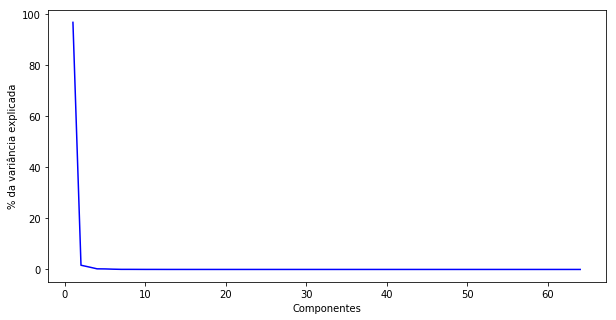

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([i + 1 for i in range(len(pca.explained_variance_ratio_))], 100 * pca.explained_variance_ratio_, 'b-')
ax.set_xlabel('Componentes')
ax.set_ylabel('% da variância explicada')
pass

Primeiros elementos [96.71311686 98.36254659 99.32135205 99.56146196 99.76429908 99.86628713
 99.90018263 99.93236289 99.95569175 99.96827882 99.97993207 99.98720371
 99.99008989 99.99256241 99.99399365 99.995182   99.99602121 99.99670565
 99.99723513 99.99762539]


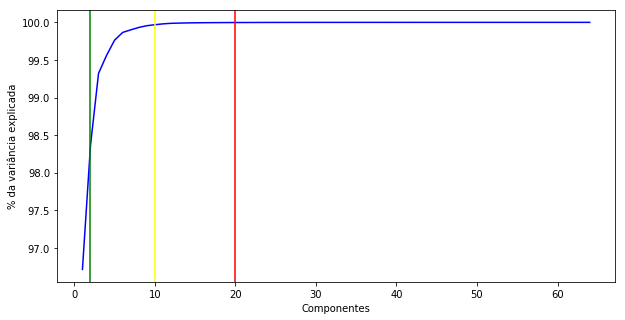

In [0]:
print('Primeiros elementos', (100 * pca.explained_variance_ratio_.cumsum())[:20])
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([i + 1 for i in range(len(pca.explained_variance_ratio_))], 100 * pca.explained_variance_ratio_.cumsum(), 'b-')
ax.axvline(2, color='green')
ax.axvline(10, color='yellow')
ax.axvline(20, color='red')
ax.set_xlabel('Componentes')
ax.set_ylabel('% da variância explicada')
pass

In [0]:
pca = PCA(n_components=20)

X_tr_pca = pca.fit_transform(X_tr_pca)
X_ts_pca = pca.transform(X_ts_pca)

In [0]:
rf_pca = RandomForestRegressor(n_estimators=100, max_features='sqrt')
rf_pca.fit(X_tr_pca, y_tr)
preds_rf = rf_pca.predict(X_ts_pca)
preds_rf = scaler_y.inverse_transform(preds_rf.reshape(-1, 1))[:, 0]

print('RMSE da RF:', RMSE(y_ts, preds_rf))
print('RRMSE da RF:', RRMSE(y_ts, preds_rf))

RMSE da RF: 0.7940860185064962
RRMSE da RF: 0.8408415302375901


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tr_pca, y_tr)

preds_lr = lr.predict(X_ts_pca)
preds_lr = scaler_y.inverse_transform(preds_lr.reshape(-1, 1))[:, 0]
print('RMSE da LR:', RMSE(y_ts, preds_lr))
print('RRMSE da LR:', RRMSE(y_ts, preds_lr))

RMSE da LR: 0.3756171877866352
RRMSE da LR: 0.39773346703532836
